#### Ejemplo de Kalman con sistema Masa-Resorte-Amortiguador

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as co
from filterpy.kalman import KalmanFilter 
from filterpy.common import Q_discrete_white_noise
from numpy.linalg import inv

#### Definición de Matrices

In [2]:
A = [[0, 1], [-1, -0.5]]
B = [[0], [10]]
C = [1, 0]
D = 0

#### Creación del sistema de estados

In [3]:
sys = co.ss(A, B, C, D)

#### Respuesta al escalón

In [4]:
t = np.linspace(0,20,1000)

In [5]:
t1, y1 = co.step_response(sys,t)

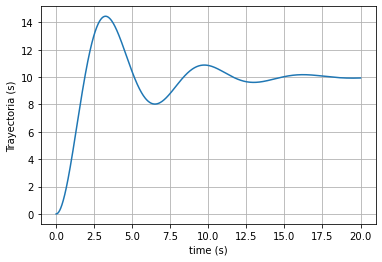

In [6]:
plt.plot(t1,y1)
plt.xlabel('time (s)')
plt.ylabel('Trayectoria (s)')
plt.grid()

### Kalman
Se utiliza un filtro contemple la posición y la velocidad del móvil. Utiliza un sensor para leer la posición.



In [40]:
tam_vec = 1000
x = [[0], [1]]
#f.x = np.array([[2.],    # position
#                [0.]])   # velocity
#x = np.ones([2, tam_vec])


In [41]:
u = np.ones([1, tam_vec])

In [42]:
A = np.matrix([[0 ,1],
                [-1, -0.5]]) # F

In [43]:
B = np.matrix([[0 ],
                [10]]) # F

In [44]:
#f.C = np.array([[1.,0.]]) # H
C = np.matrix([[1.,0.]]) # H

In [45]:
P = np.matrix([[1,0],
                [0, 1] ]) # Matriz de Covarianza, P

In [46]:
R = 0.05 # R

In [47]:
Q = np.matrix([[2.,0.],
                [0., 2.] ]) # Matriz de Covarianza, P

Con estas matrices se procede al loop de predicción/actualización

In [57]:
#for i in range (2, len(t)):
x = np.zeros([2, tam_vec])

for i in range (2, tam_vec):

#Predicción
    xk = np.dot(A,x) + B*u[:,i-1] 
#    xkp = np.insert(xkp,i,[xk[0,0], xk[1,0]],axis=1)
    
    Pk = np.dot(np.dot(A,P),np.transpose(A)) + Q
#    Pkp = np.insert(Pk,i,[Pk[0,0], Pk[1,0]],axis=1)
    
# Ganancia     
    K =  np.dot(np.dot(Pk,np.transpose(C)),inv(np.dot(np.dot(C,Pk),np.transpose(C))+R))      #Ganancia de Kalman

#Actulización
    x1 = xk + K * (y1[i]-np.dot(C,xk))
    x = np.insert(x,i,[x1[0,0], x1[1,0]],axis=1)




In [58]:
print(x)

[[0.00000000e+00 0.00000000e+00 7.83121445e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99869480e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [59]:
x[0,:].shape

(1998,)

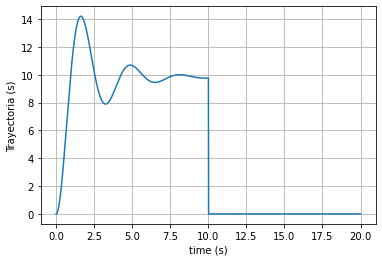

In [61]:
t = np.linspace(0,20,1998)
plt.plot(t,x[0,:])
plt.xlabel('time (s)')
plt.ylabel('Trayectoria (s)')
plt.grid()